In [141]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import svm
import matplotlib.pyplot as pt
%matplotlib inline
sb.set_style('whitegrid')

In [142]:
df = sb.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [143]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [144]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Now we will change the species into numbers so that we can predict the species easily

In [145]:
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
Y = df['tmp']

In [146]:
svm.SVC?
#idx = np.argwhere(X == 'setosa')
#Y
#df

In [147]:
C = 0.001
#clf = svm.SVC(kernel='linear', C=C)
#clf = svm.SVC(kernel='poly', C=C)
#clf = svm.SVC(kernel='rbf', C=C)
#clf = svm.SVC(kernel='sigmoid', C=C)
clf.fit(X, Y)

SVC(gamma=0.7)

In [148]:
clf.predict([[6,2]])

array([2], dtype=int64)

In [149]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max()+1
y_min, y_max = Y.min(), Y.max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [150]:
#np.meshgrid?
#np.c_?
#np.ravel?
pt.scatter?

In [151]:
#xx
#yy

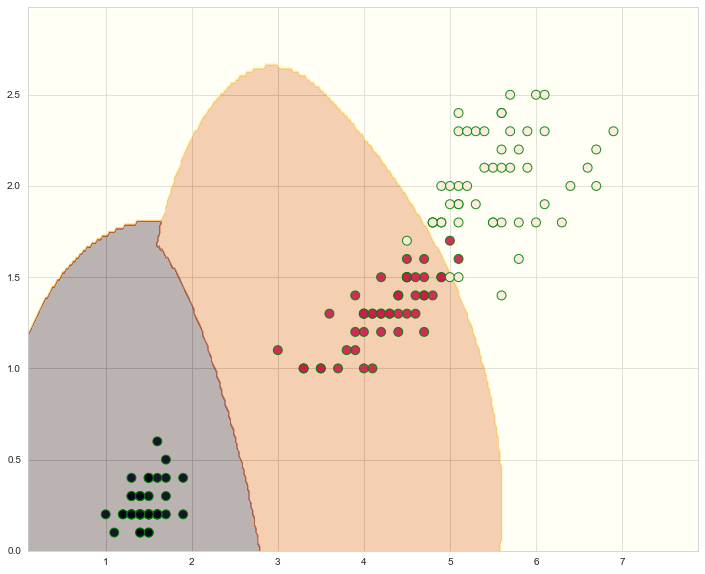

In [152]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = pt.figure(figsize=(12,10))
ax = pt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3);
pt.scatter(X.values[:, 0], X.values[:, 1], c=Y, s=80, alpha=0.9, edgecolors='g')

Now we will fit a model and find cross validation. Before fitting we need to standardize data

In [272]:
df = sb.load_dataset("iris")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
col = ['petal_length', 'petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [273]:
X = df.loc[:, col]
flower_types = df.species.unique()
name_to_num = {}
for x, val in enumerate(flower_types):
    name_to_num[val] = x
df['tmp'] = df['species'].map(name_to_num)
Y = df['tmp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [255]:
sc_X = StandardScaler()
X_std_train = sc_X.fit_transform(X_train)
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train,Y_train)

SVC(kernel='linear')

In [274]:
#this block is for rbf
C=1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, Y_train)

SVC(gamma=0.7)

In [275]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [276]:
res = cross_val_score(clf, X_std_train, Y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t\t {0:.4f}".format(np.mean(res)))
print("Average Standard Deviation: \t {0:.4f}".format(np.std(res)))

Average Accuracy: 		 0.9500
Average Standard Deviation: 	 0.0553


In [277]:
Y_train_predict = cross_val_predict(clf, X_std_train, Y_train, cv=3)
confusion_matrix(Y_train, Y_train_predict)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [278]:
print("Precision Score: \t {0:.4f}".format(precision_score(Y_train, Y_train_predict, average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(Y_train, Y_train_predict, average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(Y_train, Y_train_predict, average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


Cross validation within test dataset

In [279]:
Y_test_pred = cross_val_predict(clf, X_test, Y_test, cv=3)
confusion_matrix(Y_test, Y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [280]:
print("Precision Score: \t {0:.4f}".format(precision_score(Y_test, Y_test_pred, average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(Y_test, Y_test_pred, average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(Y_test, Y_test_pred, average='weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


Grid Search

In [281]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [282]:
#for writing parameter c of clf object there must be two underscore it's a dunderscore
params = dict({'clf__C':[0.1, 0.5, 1, 2, 5, 10, 20], 'clf__gamma':[0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]})

In [283]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy')

In [284]:
svm_grid_rbf.fit(X_std_train, Y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    0.2s finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 0.5, 1, 2, 5, 10, 20],
                         'clf__gamma': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]},
             scoring='accuracy', verbose=1)

In [285]:
Pipeline?
GridSearchCV?

In [286]:
svm_grid_rbf.best_score_

0.9583333333333334

In [287]:
best = svm_grid_rbf.best_estimator_.get_params()

In [288]:
for k in sorted(params.keys()):
    print('\t{0}: \t{1:.2f}'.format(k, best[k]))

	clf__C: 	0.10
	clf__gamma: 	0.50


Let's see in the test data if the best score is true

In [289]:
Y_test_pred = svm_grid_rbf.predict(X_test)
confusion_matrix(Y_test, Y_test_pred)

array([[ 0,  1, 10],
       [ 0,  0, 13],
       [ 0,  0,  6]], dtype=int64)